# 학습목표
keras 모델의 초기 설정을 적용합니다.
1. 학습률 감소(Learning rate Decay)
2. 학습률 계획법(Learning rate Scheduling)
3. 가중치 초기화(Weight Initialization)

### 베이스라인 모델 

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import regularizers

import os
import numpy as np
import tensorflow as tf
import keras

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

In [2]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64),
    Dense(10, activation='softmax')
])

### 1. 학습률 감소 (Learning rate Decay)

학습률이 너무 높으면 loss가 발산하거나 최적값을 찾지 못한다.

학습률이 너무 낮으면 loss가 최적값에 도달하는데 너무 많은 시간이 소요되거나, 주어진 iteration 내 최적점 도달에 실패한다.

통상적으로 바람직한 구조는, 학습 초반에는 큰 학습률에서 시작하여 점점 학습률이 감소하는 것이다.

In [5]:
# 학습률 감소는 옵티마이저의 하이퍼파라미터로 지정한다
# Adagrad, RMSprop, Adam 과 같은 주요 옵티마이저에 이미 구현되어 있다

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001,
                                                 beta_1 = 0.89), # 학습률 감소 파라미터
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 2. 학습률 계획법 (Learning rate Scheduling)

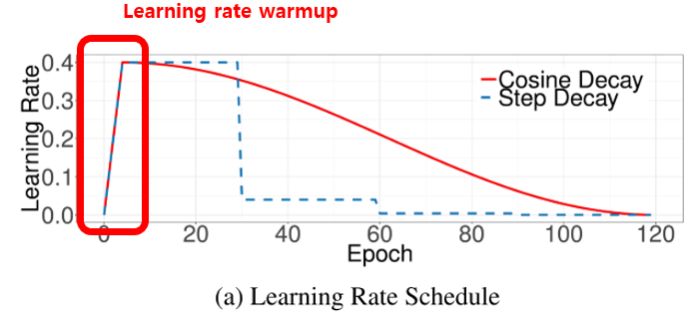

In [6]:
# 학습률 계획을 위한 하이퍼파라미터 객체 생성성
lr_decayed_fn = (
  tf.keras.experimental.CosineDecayRestarts(
      initial_learning_rate=0.01,
      first_decay_steps=1000))

# 옵티마이저의 lr로 전달
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_decayed_fn)
             , loss='sparse_categorical_crossentropy'
             , metrics=['accuracy'])

### 3. 가중치 초기화 (Weight Initialization)
1. Xavier 초기화 (sigmoid에서 사용)
2. He 초기화 (relu에서 사용) 

가중치의 초기값을 특정값으로 설정하는 기능으로, 특정 활성화함수를 사용했을 떄의 문제점을 해결하기 위해 등장했다. 

In [9]:
kernel_initializer = ['uniform', 'lecun_uniform', 'normal',
             'zero', 'glorot_normal', 'glorot_uniform',
             'he_normal', 'he_uniform']

In [10]:
# 사실 Dense layer는 'glorot_uniform'이 기본값으로 설정되어 있다

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64,
          kernel_initializer='glorot_uniform'), # kernel_initializer를 특정 uniform으로 지정정
    Dense(10, activation='softmax')
])